# Image import 
- 방법은 총 두가지로 1) gdrive에서 제공해주는 방식(링크제공) 2)실 자료를 주는 방식 ..으로 보아야 한다.
- 예시 이미지 다운 : https://drive.google.com/drive/folders/1_YaskN7jnQeEp_JF-4zsBBn3zjb_K3bV?usp=sharing

In [1]:
from google.colab import drive,files
drive.mount('/content/gdrive')#드라이브 마운트

Mounted at /content/gdrive


## 다운받은 이미지 들 중 원하는 이미지를 colab에 끌어서 업로드
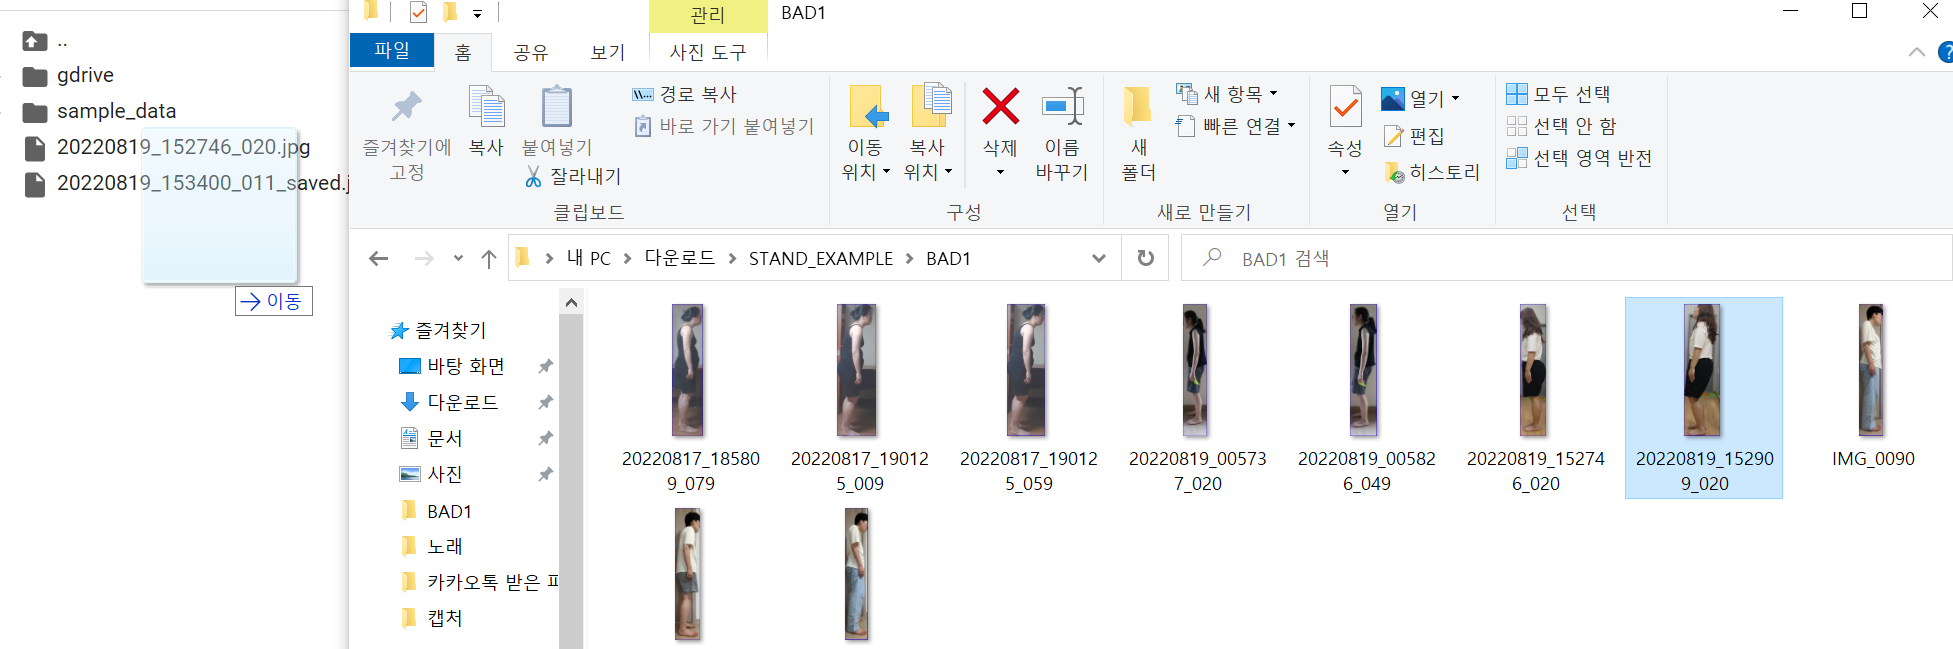

In [15]:
import matplotlib.pyplot as plt
import os
import pathlib#파일시스템 경로를 객체화
import PIL#pillow모듈/ 이미지프로세싱 라이브러리
from keras.preprocessing import image#이미지 전처리를 위해서

file_path="/content/20220819_152746_020.jpg" # 업로드한 이미지 입력( stand이미지 )
p = pathlib.Path(file_path)

In [18]:
from tensorflow import keras
import tensorflow as tf
  #Img size 244*244
#print(p)#rs - /content/20220819_152909_020.jpg # 업로드한 이미지 입력
img=keras.preprocessing.image.load_img(file_path)
img_array = keras.preprocessing.image.img_to_array(img)#PIL 형식의 이미지를 Numpy배열로 변환
img_array = tf.expand_dims(img_array, 0) # Create a batch() == 차원 추가

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

BATCH_SIZE = 128
img = image.load_img(p, target_size=(224, 224))#이미지 크기 조절(244*244)
my_image = np.array(img)#1차원 배열로 변환
my_image = np.expand_dims(my_image , axis=0)#1열 추가
test_ds = tf.keras.preprocessing.image_dataset_from_directory(#자세 종류 분류를 위해 사용됨(class종류와 size조정)
    "/content/gdrive/MyDrive/DATA0829/STAND1500/TEST", #test경로
    #  파일이 없다면 https://drive.google.com/drive/folders/1emfX_5RaR7MvrP_pdgOhdYFrbp3ikPhF?usp=sharing 에서
    #  드라이브에 바로가기 추가 -> 내 드라이브 -> 폴더생성(DATA0829) -> 생성된 폴더 안에 바로가기추가
    image_size=(224,224),
    batch_size=128 )

Found 513 files belonging to 4 classes.


In [20]:
#print(len(my_image))#244
#print(my_image)

In [21]:
class_name=test_ds.class_names
class_num=len(class_name)
print("class name",class_name)
print(class_num)#확인용 코드(class 이름과 종류)

for image_batch, labels_batch in test_ds:
  print(image_batch.shape) #tensor의 형태
  print(labels_batch.shape) #이미지 묶음 출력
  #확인용 코드
  #위 둘은 .numpy()를 호출하여 이를 numpy.ndarray로 변환할 수 있음
  break

class name ['BAD1', 'BAD2', 'BAD3', 'GOOD']
4
(128, 224, 224, 3)
(128,)


In [22]:
# from tensorflow.keras import layers
# normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
# normalized_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))
# image_batch, labels_batch = next(iter(normalized_ds))

#import model
- pose_best_model2가 이번에하면서 best모델 저장
- stand model은 전체저장(about good~bad's)

In [23]:
import os
import pandas as pd

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import GaussianNoise
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization, Conv2D, MaxPooling2D, Input
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.regularizers import l1, l2, L1L2
from keras.models import Sequential
import time

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

from tensorflow.python.keras.models import load_model

## 모델 설정해주기
- stand의 모델은 : pose_stand_model2.h5
- 모델 다운 폴더 : https://drive.google.com/drive/folders/1c3TwztHqCNQwV36WDg4YZdN-Ix5MmIUq?usp=sharing
- 드라이브에 바로가기 추가 -> 내 드라이브 -> 폴더생성(DATA0829) -> 생성된 폴더 안에 바로가기추가


In [26]:
import os
import tensorflow as tf

from tensorflow .keras. optimizers import Adam
optimizer = Adam(learning_rate= 0.001*0.1, decay = 0.01 ) #lr

model=load_model("/content/gdrive/MyDrive/DATA0829/tmp_data/pose_stand_model2.h5",custom_objects={"BatchNormalization":BatchNormalization})
# 다운받은 모델의 경로를 써주기, # 파일은 https://drive.google.com/drive/folders/1c3TwztHqCNQwV36WDg4YZdN-Ix5MmIUq?usp=sharing
# 같은 방식으로 해주면 된다
#모델 전체를 불러옴
#model.summary()

# IN model.. image detecting

In [27]:
predictions = model.predict(my_image)#이미지를 입력으로 함 / 모델로 예측을 수행

score = tf.nn.softmax(predictions[0])#다양한 class의 결과에 대한 확률을 output으로 받음
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_name[np.argmax(score)], 100 * np.max(score))
    #배열에서 가장 높은 값을 가진 값의 인덱스를 반환 후 class_name의 값 반환 / 가장 높은 확률을 보여줌
)

This image most likely belongs to BAD1 with a 47.54 percent confidence.
